In [3]:
#data analysis and manipulation
import numpy as np
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
#statistics and machine learning
from statsmodels.tsa.api import adfuller
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GM
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.simplefilter('ignore')

C:\Users\deepa\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\deepa\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [4]:
fundamentals=pd.read_csv('constituents-financials.csv')

In [5]:
fundamentals

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,12915021000,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,27003303098,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,24454698119,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,10670678640,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [6]:
fundamentals.pop('SEC Filings')
fundamentals.pop('Price/Book')
fundamentals.pop('Price/Sales')
fundamentals.pop('EBITDA')
fundamentals.pop('52 Week High')
fundamentals.pop('52 Week Low')
fundamentals.pop('Earnings/Share')
fundamentals.pop('Price')
fundamentals

,Symbol,Name,Sector,Price/Earnings,Dividend Yield,Market Cap
0,MMM,3M Company,Industrials,24.31,2.332862,138721055226
1,AOS,A.O. Smith Corp,Industrials,27.76,1.147959,10783419933
2,ABT,Abbott Laboratories,Health Care,22.51,1.908982,102121042306
3,ABBV,AbbVie Inc.,Health Care,19.41,2.499560,181386347059
4,ACN,Accenture plc,Information Technology,25.47,1.714470,98765855553
...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,30.94,1.170079,12915021000
501,YUM,Yum! Brands Inc,Consumer Discretionary,27.25,1.797080,27003303098
502,ZBH,Zimmer Biomet Holdings,Health Care,14.32,0.794834,24454698119
503,ZION,Zions Bancorp,Financials,17.73,1.480933,10670678640


In [7]:
features=fundamentals.iloc[:]

In [8]:
from scipy.spatial.distance import cdist

In [9]:
#creating our elbow technique method
def find_k(features):
#intializing a list to hold costs or errors
    costs=[]
#iterating over possible values for k
    for k in range(1,51):
        model=KMeans(n_clusters=k)
        model.fit(features)
        costs.append(sum(np.min(cdist(features,model.cluster_centers_,'euclidean'),axis=1)))
#plotting our elbow graph
    with plt.style.context(['classic','ggplot']):
        plt.figure(figsize=(10,6))
        plt.plot(costs)
        plt.xlabel('Clusters')
        plt.ylabel('Errors')
        plt.title('Finding K')
        plt.show()

In [10]:
#making a copy of our original features dataframe
features_copy=features.copy()
#reindexing our features dataframe
features_copy=features_copy.reindex(index=features_copy['Symbol'],columns=features_copy.columns)
features_copy.head()

,Symbol,Name,Sector,Price/Earnings,Dividend Yield,Market Cap
Symbol,,,,,,
MMM,NaN,NaN,NaN,NaN,NaN,NaN
AOS,NaN,NaN,NaN,NaN,NaN,NaN
ABT,NaN,NaN,NaN,NaN,NaN,NaN
ABBV,NaN,NaN,NaN,NaN,NaN,NaN
ACN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#adding our data back to their respective columns
features_copy['P/E']=features['Price/Earnings'].values
features_copy['EPS']=features['Dividend Yield'].values
features_copy['MarketCap']=features['Market Cap'].values
features_copy.head()

,Symbol,Name,Sector,Price/Earnings,Dividend Yield,Market Cap,P/E,EPS,MarketCap
Symbol,,,,,,,,,
MMM,NaN,NaN,NaN,NaN,NaN,NaN,24.31,2.332862,138721055226
AOS,NaN,NaN,NaN,NaN,NaN,NaN,27.76,1.147959,10783419933
ABT,NaN,NaN,NaN,NaN,NaN,NaN,22.51,1.908982,102121042306
ABBV,NaN,NaN,NaN,NaN,NaN,NaN,19.41,2.499560,181386347059
ACN,NaN,NaN,NaN,NaN,NaN,NaN,25.47,1.714470,98765855553


In [12]:
features_copy.pop('Symbol')
features_copy.pop('Name')
features_copy.pop('Sector')
features_copy.pop('Price/Earnings')
features_copy.pop('Dividend Yield')
features_copy.pop('Market Cap')
features_copy.pop('EPS')

features_copy




,P/E,MarketCap
Symbol,,
MMM,24.31,138721055226
AOS,27.76,10783419933
ABT,22.51,102121042306
ABBV,19.41,181386347059
ACN,25.47,98765855553
...,...,...
XYL,30.94,12915021000
YUM,27.25,27003303098
ZBH,14.32,24454698119


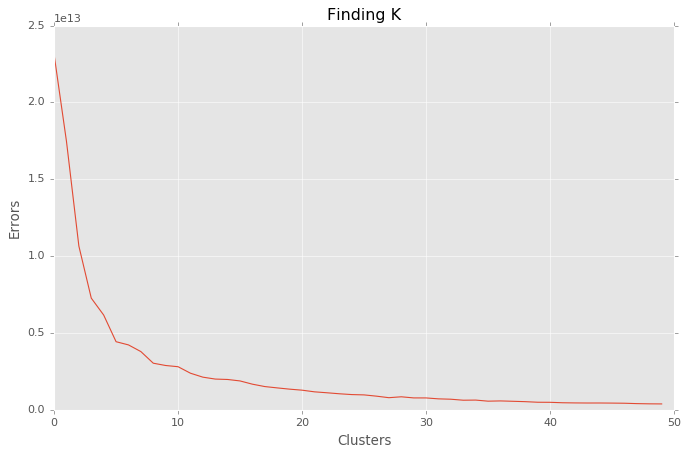

In [13]:
#finding K
find_k(features_copy.fillna(0))

In [14]:
#Here we will use k as 15

In [15]:
#features_copy=features_copy.iloc[0:10]
features_copy

,P/E,MarketCap
Symbol,,
MMM,24.31,138721055226
AOS,27.76,10783419933
ABT,22.51,102121042306
ABBV,19.41,181386347059
ACN,25.47,98765855553
...,...,...
XYL,30.94,12915021000
YUM,27.25,27003303098
ZBH,14.32,24454698119


In [16]:
#initialzing K-Means algorithm
kmeans=KMeans(n_clusters=15,random_state=101)

In [17]:
#fitting kmeans to our features data
kmeans.fit(features_copy.fillna(0))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [18]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=101, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [19]:
#getting cluster labels
kmeans.labels_

array([ 7,  0,  3,  4,  3,  5,  0,  3,  0,  0,  0,  5,  0,  8, 12,  8,  0,
        0,  0,  0, 12, 12,  0,  5,  0,  0,  8,  2,  2,  7, 13,  0, 12,  8,
       11,  5,  5,  0, 12, 12, 12,  7, 12,  8,  8,  0,  0, 11,  8,  0,  0,
       10,  5, 12, 12,  0,  0,  0,  4, 12,  5, 12, 12,  0,  8,  0,  1,  8,
        8,  5, 14, 12, 11,  3,  0,  4,  0, 12,  8,  0,  3,  3,  0,  0,  0,
        0,  0,  0,  5, 12,  0,  5,  3,  0,  0, 12, 11, 12,  0, 12, 12,  0,
       11,  3,  0,  4,  0, 11,  0,  5,  0,  0, 12,  4,  4, 12,  0,  5,  0,
        4,  5, 11,  4,  0,  0, 12, 11, 12,  8, 12, 11,  0,  5,  0,  5,  8,
       11, 12, 11,  0,  0,  5,  8,  0, 12, 12, 12,  0,  0, 12, 12, 12,  5,
        0,  7, 12, 12,  5,  0, 12,  0,  0,  8,  5,  8, 12, 12,  8,  5,  0,
        0, 11,  0,  0,  8, 12,  0,  5,  0, 12,  8, 12,  0,  8,  0,  1,  0,
        6,  0,  0, 11,  8, 12,  0, 12,  0,  0,  0,  0,  0,  8, 12,  0, 12,
       12,  0,  0,  0, 11,  7, 12,  8, 11,  0,  3, 12,  3,  0,  0,  5,  0,
        0, 12, 12,  0,  8

In [20]:
#adding cluster labels to dataframe
features_copy['Cluster']=kmeans.labels_

In [21]:
#reviewing features dataframe
features_copy.head(6)

,P/E,MarketCap,Cluster
Symbol,,,
MMM,24.31,138721055226,7
AOS,27.76,10783419933,0
ABT,22.51,102121042306,3
ABBV,19.41,181386347059,4
ACN,25.47,98765855553,3
ATVI,31.80,52518668144,5


Text(0, 0.5, 'Cluster number')

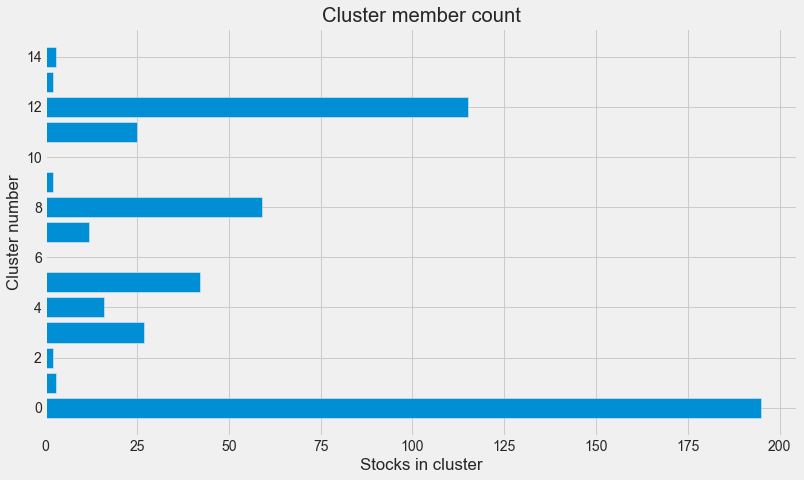

In [406]:
#creating dataframe to hold data
clusters_df=pd.DataFrame()
#grouping our data by cluster for clusters with atleast 2 stocks in it.
clusters_df=pd.concat(i for clusters_df, i in features_copy.groupby(features_copy['Cluster']) if len(i) >1)
x=clusters_df['Cluster'].value_counts()
#print(x)
y=[195,3,2,27,16,42,0,12,59,2,0,25,115,2,3]
plt.figure(figsize=(12,7))
plt.barh(range(15),y)
plt.title('Cluster member count')
plt.xlabel('Stocks in cluster')
plt.ylabel('Cluster number')

In [208]:
#checking the head of clusters df
clusters_df

,P/E,MarketCap,Cluster
Symbol,,,
AOS,27.76,10783419933,0
AYI,18.22,6242377704,0
AAP,19.54,8123611867,0
AMD,187.00,11191663795,0
AES,9.96,6920851212,0
...,...,...,...
AMZN,296.16,685873374731,13
MSFT,25.76,689978437468,13
BRK.B,30.43,261401203633,14


In [209]:
#sns.scatterplot(x="P/E", y="MarketCap",hue = 'Cluster',  data=clusters_df)
#checking the tail of our cluster df
clusters_df.tail()

,P/E,MarketCap,Cluster
Symbol,,,
AMZN,296.16,685873374731,13
MSFT,25.76,689978437468,13
BRK.B,30.43,261401203633,14
V,32.72,270038723213,14
WFC,13.58,281463620775,14


In [210]:
#creating method to identify each possible pair
def create_pairs(symbolList):
 #creating a list to hold each possible pair
    pairs=[]
 #initializing placeholders for the symbols in each pair
    x=0
    y=0
    for count,symbol in enumerate(symbolList):
        for nextCount,nextSymbol in enumerate(symbolList):
            x=symbol
            y=nextSymbol
            if x!=y:
                pairs.append([x,y])

    return pairs

In [211]:
symbol_list=['AOS','AYI','AAP','AMD','AES','AKAM']


In [212]:
#list of lists of pairs
all_pairs=create_pairs(symbol_list)

In [234]:
all_pairs
#print(len(all_pairs))

[['AOS', 'AYI'],
 ['AOS', 'AAP'],
 ['AOS', 'AMD'],
 ['AOS', 'AES'],
 ['AOS', 'AKAM'],
 ['AYI', 'AOS'],
 ['AYI', 'AAP'],
 ['AYI', 'AMD'],
 ['AYI', 'AES'],
 ['AYI', 'AKAM'],
 ['AAP', 'AOS'],
 ['AAP', 'AYI'],
 ['AAP', 'AMD'],
 ['AAP', 'AES'],
 ['AAP', 'AKAM'],
 ['AMD', 'AOS'],
 ['AMD', 'AYI'],
 ['AMD', 'AAP'],
 ['AMD', 'AES'],
 ['AMD', 'AKAM'],
 ['AES', 'AOS'],
 ['AES', 'AYI'],
 ['AES', 'AAP'],
 ['AES', 'AMD'],
 ['AES', 'AKAM'],
 ['AKAM', 'AOS'],
 ['AKAM', 'AYI'],
 ['AKAM', 'AAP'],
 ['AKAM', 'AMD'],
 ['AKAM', 'AES']]

In [235]:
#initializing our stock variables
aos=pd.read_csv('AOS.csv')
ayi=pd.read_csv('AYI.csv')
aap=pd.read_csv('AAP.csv')
amd=pd.read_csv('AMD.csv')
aes=pd.read_csv('AES.csv')
#amg=pd.read_csv('AMG.csv')
akam=pd.read_csv('AKAM.csv')

In [236]:
aos.head()
     

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-28,41.430000,41.895000,41.270000,41.840000,38.725090,1775000
1,2016-06-29,42.279999,42.980000,42.279999,42.799999,39.613613,908200
2,2016-06-30,42.945000,44.055000,42.825001,44.055000,40.775181,1470200
3,2016-07-01,44.055000,44.485001,43.474998,43.605000,40.358696,1551400
4,2016-07-05,43.540001,43.540001,42.875000,43.264999,40.043995,1224000


In [237]:
akam.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2021-06-21,115.330002,116.070000,114.620003,115.820000,115.820000,1329000
1254,2021-06-22,116.129997,116.339996,115.250000,115.980003,115.980003,865500
1255,2021-06-23,116.199997,116.230003,114.949997,115.959999,115.959999,636700
1256,2021-06-24,116.809998,116.889999,115.690002,115.830002,115.830002,784200
1257,2021-06-25,115.709999,118.220001,115.239998,116.949997,116.949997,4032600


In [238]:
#creating list to hold original data
original_data={'AOS':aos,'AYI':ayi,'AAP':aap,'AMD':amd,'AES':aes,'AKAM':akam}

In [239]:
# training period   28-06-2016-->28-6-2020  
# testing period     19-03-2021-->17-06-2021
original_data

{'AOS':             Date       Open       High        Low      Close  Adj Close  \
 0     2016-06-28  41.430000  41.895000  41.270000  41.840000  38.725090   
 1     2016-06-29  42.279999  42.980000  42.279999  42.799999  39.613613   
 2     2016-06-30  42.945000  44.055000  42.825001  44.055000  40.775181   
 3     2016-07-01  44.055000  44.485001  43.474998  43.605000  40.358696   
 4     2016-07-05  43.540001  43.540001  42.875000  43.264999  40.043995   
 ...          ...        ...        ...        ...        ...        ...   
 1253  2021-06-21  66.680000  67.889999  66.660004  67.639999  67.639999   
 1254  2021-06-22  67.800003  68.260002  67.190002  67.919998  67.919998   
 1255  2021-06-23  68.129997  68.720001  67.750000  68.139999  68.139999   
 1256  2021-06-24  68.489998  68.580002  67.540001  67.769997  67.769997   
 1257  2021-06-25  68.070000  69.320000  68.070000  69.269997  69.269997   
 
        Volume  
 0     1775000  
 1      908200  
 2     1470200  
 3     1551

In [240]:
#function to parse out training period data
def get_training_data(original_data,symbol_list,start,end):
    '''
PARAMETERS:

original_data - the dictionary we created that holds our dataframes
symbol_list - the list of symbols; data type are strings
start - the beginning date of our training period as a string
end - the ending date of our training period as a string
    '''
#creating a dataframe to hold our parsed series
    training_df=pd.DataFrame()
#iterating over our symbol list
    for count, symbol in enumerate(symbol_list):

        try:
#making a copy of our original data for each symbol
            copy=original_data[symbol].copy()
#reindexing our copied data by Date column
            copy=copy.reindex(index=copy['Date'],columns=copy.columns)
#restoring values of close column from our original data
            copy[' Close']=original_data[symbol]['Close'].values
#parsing out our training period
            copy=copy.loc[start:end][' Close']
#adding training data to dataframe
            training_df[str(symbol)]=copy.values

        except:
            print(str(symbol),'Threw an Exception')
            print('Current Symbol Length:')
            print(len(copy.loc[start:end]))
            print("")
            print('training_df Length:')
            print(len(training_df))
            continue

    return training_df


In [241]:
#creating our training data dataframe using our training period start and end dates
training_df=get_training_data(original_data,symbol_list,'2016-06-28','2020-06-28')
training_df

,AOS,AYI,AAP,AMD,AES,AKAM
0,41.840000,244.660004,156.979996,5.120000,11.79,53.049999
1,42.799999,246.610001,161.009995,5.130000,12.03,54.560001
2,44.055000,247.960007,161.630005,5.140000,12.48,55.930000
3,43.605000,250.250000,164.330002,5.070000,12.33,55.500000
4,43.264999,246.990005,161.190002,4.960000,12.20,54.250000
...,...,...,...,...,...,...
1002,47.189999,89.320000,151.600006,54.759998,13.98,101.589996
1003,47.470001,90.529999,149.970001,53.990002,13.84,100.879997
1004,45.110001,85.809998,143.000000,52.389999,13.84,100.970001
1005,44.740002,86.820000,142.910004,51.930000,13.88,102.889999


In [242]:
from scipy.stats import linregress

In [407]:
def get_cointegrated(all_pairs,training_df):
    '''
PARAMETERS
#########

all_pairs - the list of all possible pair combinations from Cluster 0
training_df - our dataframe holding our stock data for stocks in Cluster 0 over the training period

     '''
#creating a list to hold cointegrated pairs
    cointegrated=[]
    I=0
#iterate over each pair in possible pairs list; pair is a list of our 2 stock symbols
    for count, pair in enumerate(all_pairs):
        try:
#getting data for each stock in pair from training_df
            ols=linregress(training_df[str(pair[1])],training_df[str(pair[0])]) #note scipy's linregress takes in Y then X
#storing slope or hedge ratio in variable
            slope=ols[0]
            I=I+1
            print(pair)
#creating spread
            spread=training_df[str(pair[1])]-(slope*training_df[str(pair[0])])
#testing spread for cointegration
            cadf=adfuller(spread,1)
#checking to see if spread is cointegrated, if so then store pair in cointegrated list
            if cadf[0] < cadf[4]['1%']:
                print('Pair Cointegrated at 99% Confidence Interval')
#appending the X and Y of pair
                cointegrated.append([pair[0],pair[1]])
            elif cadf[0] < cadf[4]['5%']:
                print('Pair Cointegrated at 95% Confidence Interval')
#appending the X and Y of pair
                cointegrated.append([pair[0],pair[1]])
            elif cadf[0] < cadf[4]['10%']:
                print('Pair Cointegrated at 90% Confidence Interval')
                cointegrated.append(pair[0],pair[1])
            else:
                print('Pair Not Cointegrated ')
            continue
        except:
            print('Exception: Symbol not in Dataframe')
            continue

    return cointegrated

In [408]:
#getting our cointegrated pairs
cointegrated_from_cluster=get_cointegrated(all_pairs,training_df)

Exception: Symbol not in Dataframe
Exception: Symbol not in Dataframe
Exception: Symbol not in Dataframe
Exception: Symbol not in Dataframe
Exception: Symbol not in Dataframe
Exception: Symbol not in Dataframe
['AYI', 'AAP']
Pair Not Cointegrated 
['AYI', 'AMD']
Pair Not Cointegrated 
['AYI', 'AES']
Pair Not Cointegrated 
['AYI', 'AKAM']
Pair Not Cointegrated 
Exception: Symbol not in Dataframe
['AAP', 'AYI']
Pair Not Cointegrated 
['AAP', 'AMD']
Pair Not Cointegrated 
['AAP', 'AES']
Pair Not Cointegrated 
['AAP', 'AKAM']
Pair Not Cointegrated 
Exception: Symbol not in Dataframe
['AMD', 'AYI']
Pair Not Cointegrated 
['AMD', 'AAP']
Pair Not Cointegrated 
['AMD', 'AES']
Pair Not Cointegrated 
['AMD', 'AKAM']
Pair Not Cointegrated 
Exception: Symbol not in Dataframe
['AES', 'AYI']
Pair Not Cointegrated 
['AES', 'AAP']
Pair Not Cointegrated 
['AES', 'AMD']
Pair Not Cointegrated 
['AES', 'AKAM']
Pair Not Cointegrated 
Exception: Symbol not in Dataframe
['AKAM', 'AYI']
Pair Not Cointegrated 

In [245]:
cointegrated_from_cluster=['AKAM','AMD']

In [246]:
#creating copies of our data
#a_copy=aos.copy()
akam_copy=akam.copy()
amd_copy=amd.copy()

In [248]:
#reindexing our data
#aos_copy=aos_copy.reindex(index=aos_copy['Date'],columns=aos_copy.columns)
akam_copy=akam_copy.reindex(index=akam_copy['Date'],columns=akam_copy.columns)
amd_copy=amd_copy.reindex(index=amd_copy['Date'],columns=amd_copy.columns)

In [249]:
akam_copy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2016-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
#dropping date columns
#aos_copy.drop('Date',axis=1,inplace=True)
akam_copy.drop('Date',axis=1,inplace=True)
amd_copy.drop('Date',axis=1,inplace=True)

In [251]:
#restoring our column values back to our data
#aos_copy[['Open','High','Low','Close','Adj Close','Volume']]=aos[['Open','High','Low','Close','Adj Close','Volume']].values
akam_copy[['Open','High','Low','Close','Adj Close','Volume']]=akam[['Open','High','Low','Close','Adj Close','Volume']].values
amd_copy[['Open','High','Low','Close','Adj Close','Volume']]=amd[['Open','High','Low','Close','Adj Close','Volume']].values

In [383]:
amd_copy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-28,4.95,5.19,4.91,5.12,5.12,29221400.0
2016-06-29,5.31,5.40,5.10,5.13,5.13,33118300.0
2016-06-30,5.13,5.19,4.95,5.14,5.14,26124800.0
2016-07-01,5.09,5.14,5.00,5.07,5.07,18255900.0
2016-07-05,5.03,5.05,4.88,4.96,4.96,16332500.0


In [253]:
#aos_test=aos_copy.loc['2021-03-19':]
akam_test=akam_copy.loc['2020-06-29':]
amd_test=amd_copy.loc['2020-06-29':]

In [382]:
akam_test.head()
#print(aos_test['Date'].tolist())
#print(len(aos_test))

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-29,105.620003,105.709999,103.550003,104.989998,104.989998,1862500.0
2020-06-30,105.379997,107.529999,105.110001,107.089996,107.089996,1709600.0
2020-07-01,106.550003,107.000000,104.889999,106.330002,106.330002,1746400.0
2020-07-02,109.980003,114.370003,109.139999,113.120003,113.120003,4433900.0
2020-07-06,116.000000,116.389999,111.879997,112.610001,112.610001,2911500.0


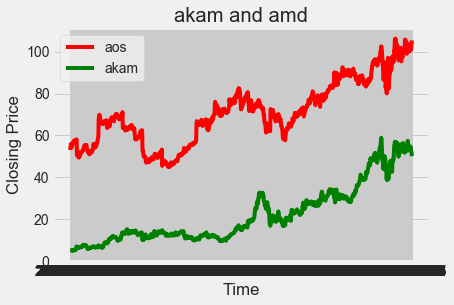

In [409]:
import matplotlib.pyplot as plt
import numpy as np
  
# Using Numpy to create an array X
X1=aos['Date'].tolist()
X=X1[0:1007]
  
# Assign variables to the y axis part of the curve
y_1=training_df['AKAM'].tolist()
z_1 = training_df['AMD'].tolist()

z1=np.add(y_1,z_1)
z1=z1/2
r1=training_df['AKAM']/training_df['AMD']
  
# Plotting both the curves simultaneously
plt.plot(X, y_1, color='r', label='aos')
plt.plot(X, z_1, color='g', label='akam')
#plt.plot(X, z1, color='b', label='average')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("akam and amd")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

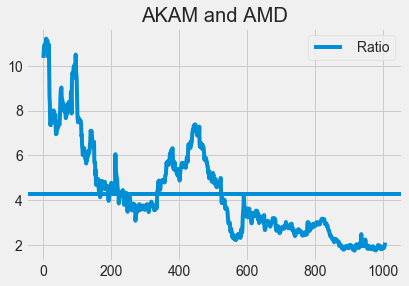

In [258]:
#plOTTING THE RATIO
plt.plot(r1)
plt.axhline(r1.mean())
plt.title('AKAM and AMD')
plt.legend([' Ratio'])
plt.show()

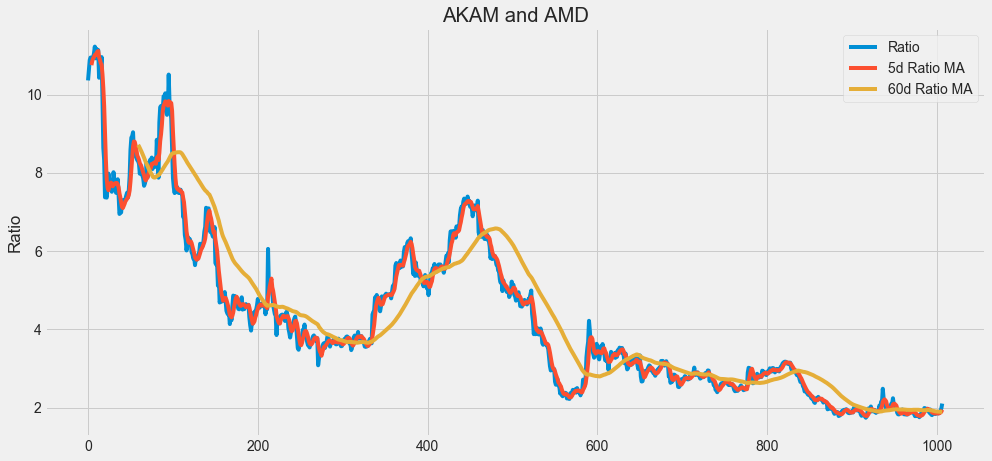

In [259]:
ratios_mavg5 = r1.rolling(window=5, center=False).mean()

ratios_mavg60 = r1.rolling(window=60, center=False).mean()

std_60 = r1.rolling(window=60, center=False).std()

zscore_60_5_1 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(15, 7))
plt.plot(r1.index, r1.values)
plt.title('AKAM and AMD')
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)

plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

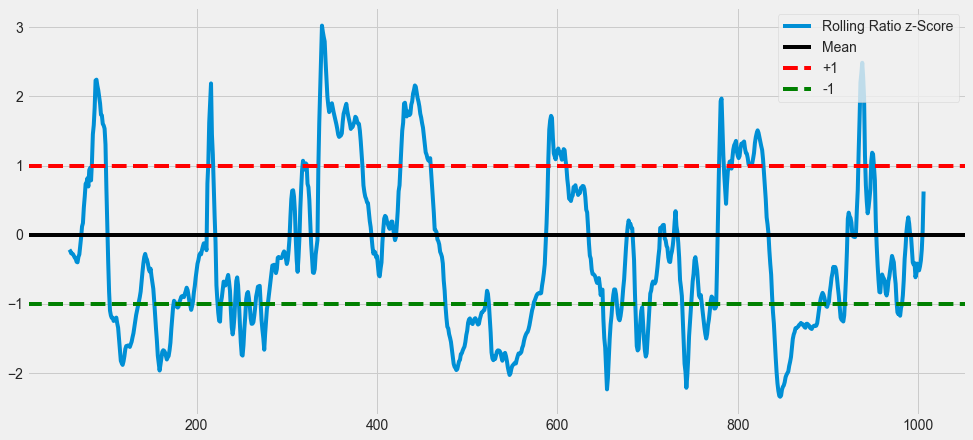

In [260]:
plt.figure(figsize=(15,7))
plt.plot(zscore_60_5_1)
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()


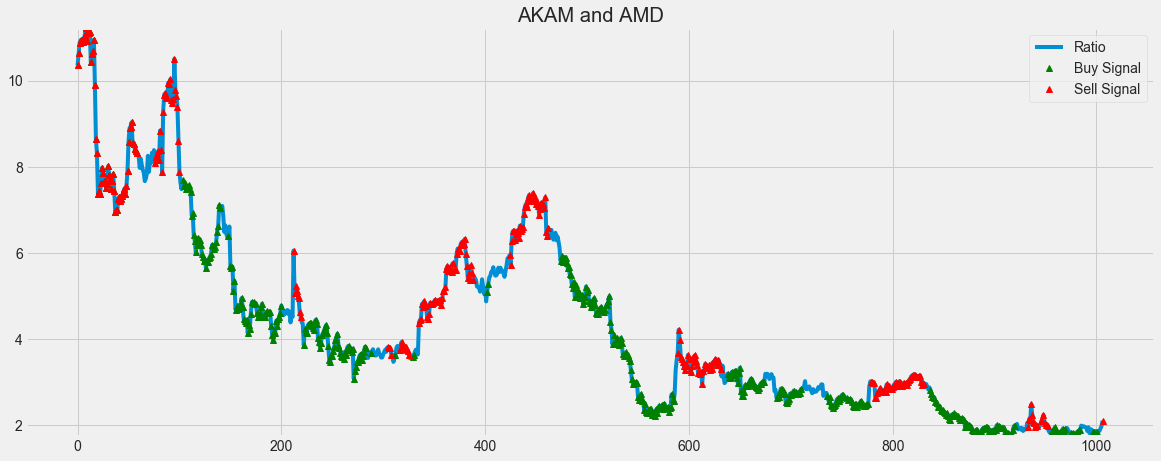

In [261]:
plt.figure(figsize=(18,7))

plt.plot(r1)
buy = r1.copy()
sell = r1.copy()
buy[zscore_60_5_1>-.5] = 0
sell[zscore_60_5_1<.5] = 0
plt.plot(buy,color='g', linestyle='None', marker='^')
plt.plot(sell,color='r', linestyle='None', marker='^')
plt.title('AKAM and AMD')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, r1.min(), r1.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

1007
0       5.12
1       5.13
2       5.14
3       5.07
4       4.96
        ... 
1002    0.00
1003    0.00
1004    0.00
1005    0.00
1006    0.00
Name: AKAM, Length: 1007, dtype: float64
1007


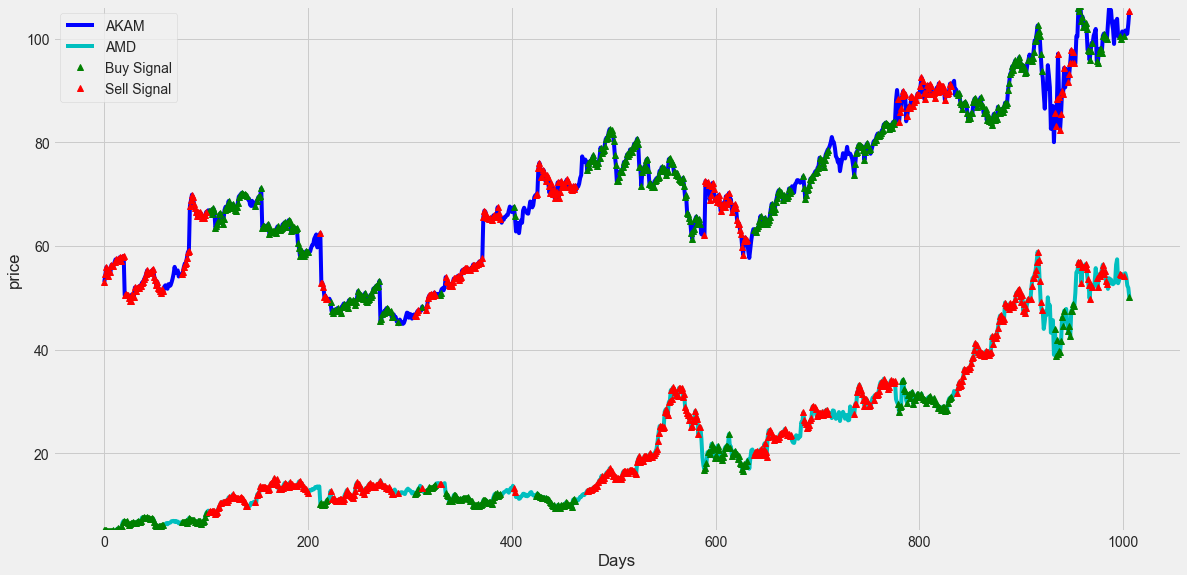

In [380]:
plt.figure(figsize=(18,9))
S1 = training_df['AKAM']
S2 = training_df['AMD']

plt.plot(S1,color='b')
plt.plot(S2,color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
print(len(buyR))
print(sellR)

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]
print(len(sellR))

plt.plot(buyR,color='g', linestyle='None', marker='^')
plt.plot(sellR,color='r', linestyle='None', marker='^')
plt.xlabel("Days")
plt.ylabel("price")
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))

plt.legend(['AKAM', 'AMD', 'Buy Signal', 'Sell Signal'])
plt.show()

In [417]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    P=0
    j=0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] < -1:
                money += S1[i] - S2[i] * ratios[i]
                countS1 -= 1
                countS2 += ratios[i]
                j=0
            #print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Buy long if the z-score is < -1
        elif zscore[i] > 1:
                if j==0:
                    P=P+S1[i]+S2[i]
                    j=1
                money -= S1[i] - S2[i] * ratios[i]
                countS1 += 1
                countS2 -= ratios[i]
            #print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            #print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
    Y=abs(money) 
    #Profit
    #print(Y)
    P=3*P
    print("Percentage returns is ",(Y/P)*100)
    #RETURN MONEY
    

In [418]:
trade(training_df['AKAM'], training_df['AMD'], 60, 5)

Percentage returns is  43.26076372920325


In [343]:
#trade(aos_test['Close'],akam_test['Close'],60,5)

In [285]:
import pandas as pd
dict1={'akam':training_df['AKAM'].tolist(),'amd':training_df['AMD'].tolist()}
pd1=pd.DataFrame(dict1,X)
pd1

,akam,amd
2016-06-28,53.049999,5.120000
2016-06-29,54.560001,5.130000
2016-06-30,55.930000,5.140000
2016-07-01,55.500000,5.070000
2016-07-05,54.250000,4.960000
...,...,...
2020-06-22,101.589996,54.759998
2020-06-23,100.879997,53.990002
2020-06-24,100.970001,52.389999
2020-06-25,102.889999,51.930000


In [286]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [287]:
assets=['AKAM','AMD']
#Assign weights
weights=np.array([0.5,0.5])

returns=pd1.pct_change()
returns



,akam,amd
2016-06-28,NaN,NaN
2016-06-29,0.028464,0.001953
2016-06-30,0.025110,0.001949
2016-07-01,-0.007688,-0.013619
2016-07-05,-0.022523,-0.021696
...,...,...
2020-06-22,0.011148,0.009773
2020-06-23,-0.006989,-0.014061
2020-06-24,0.000892,-0.029635
2020-06-25,0.019016,-0.008780


In [288]:
 #Create and show annualized covariance matrix

cov_matrix_annual=returns.cov()*189
cov_matrix_annual

,akam,amd
akam,0.079428,0.039903
amd,0.039903,0.268919


In [289]:
#Calculate portfolio variance
port_variance=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.10703806964437275

In [290]:
#Calculate the portfolio volatility
port_volatility=np.sqrt(port_variance)
port_volatility

0.32716673065024926

In [291]:
#Calulate the annual portfolio return
portfolioSimpleAnnualReturn=np.sum(returns.mean()*weights)*183
portfolioSimpleAnnualReturn

0.354452152539918

In [292]:
#Show the expected annual return , volatility (risk) and variance

percent_var=str(round(port_variance,2)*100)+'%'
percent_vols=str(round(port_volatility,2)*100)+'%'
percent_ret=str(round(portfolioSimpleAnnualReturn,2)*100)+'%'
x=round(portfolioSimpleAnnualReturn,2)*100
y=round(port_volatility,2)*100
print("Expected annual return: "+percent_ret)
print("Annual volatility/Risk: "+percent_vols)
print("Annual Variance: "+percent_var)

print("Sharpe ratio ",x/y)

Expected annual return: 35.0%
Annual volatility/Risk: 33.0%
Annual Variance: 11.0%
Sharpe ratio  1.0606060606060606


In [293]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [294]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [295]:
#Portfolio optimization using efficient frontier
#Calculate expected returns and annnualised sample covariance matrix of asset returns

mu=expected_returns.mean_historical_return(pd1)
S=risk_models.sample_cov(pd1)

#optimize for max sharpe ratio

ef=EfficientFrontier(mu,S)
weights=ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

#pypfopt.plotting.plot_efficient_frontier(ef, ef_param='return', ef_param_range=None, points=100, ax=None, show_assets=True, **kwargs)

OrderedDict([('akam', 0.22202), ('amd', 0.77798)])
Expected annual return: 64.1%
Annual volatility: 49.1%
Sharpe Ratio: 1.27


(0.6411979279003884, 0.4905288731414939, 1.2663840232727805)

In [168]:
#Closing price series for data
aos_test_price_series=np.array(aos_test['Close'])
akam_test_price_series=np.array(akam_test['Close'])
aap_test_price_series=np.array(aap_test['Close'])

In [169]:
aos_test_price_series[0:5]

array([67.480003, 67.480003, 65.620003, 65.260002, 66.730003])

In [170]:
class statarb(object):

    def __init__(self,df1, df2,ma,floor, ceiling,beta_lookback,start,end,exit_zscore=0):

#setting the attributes
        self.df1=df1 #array of prices for X
        self.df2=df2 #array of prices for Y
        self.ma=ma# the lookback period
        self.floor=floor #the buy threshold for the z-score
        self.ceiling=ceiling #the sell threshold for the z-score
        self.Close='Close Long' #used as close signal for longs
        self.Cover='Cover Short' #used as close signal for shorts
        self.exit_zscore=exit_zscore #the z-score
        self.beta_lookback=beta_lookback #the lookback for hedge ratio
        self.start=start #the beginning of test period as a string
        self.end=end # the end of test period as a string

#create price spread
    def create_spread(self):

#creating new dataframe
        self.df=pd.DataFrame(index=range(0,len(self.df1)))

        try:
            self.df['X']=self.df1
            self.df['Y']=self.df2

        except:
            print('Length of self.df:')
            print(len(self.df))
            print('')
            print('Length of self.df1:')
            print(len(self.df1))
            print('')
            print('Length of self.df2:')
            print(len(self.df2))

#calculating the beta of the pairs
        ols=linregress(self.df['Y'],self.df['X'])
        self.df['Beta']=ols[0]

#calculating the spread
        self.df['Spread']=self.df['Y']-(self.df['Beta'].rolling(window=self.beta_lookback).mean()*self.df['X'])

        return self.df.head()

    def generate_signals(self):

#creating the z-score
        self.df['Z-Score']=(self.df['Spread']-self.df['Spread'].rolling(window=self.ma).mean())/self.df['Spread'].rolling(window=self.ma).std()

#prior z-score
        self.df['Prior Z-Score']=self.df['Z-Score'].shift(1)

#Creating Buy and Sell Signals; when to be long, short, exit
        self.df['Longs']=(self.df['Z-Score']<=self.floor)*1.0 #buy the spread
        self.df['Shorts']=(self.df['Z-Score']>=self.ceiling)*1.0 #short the spread
        self.df['Longs_Exit']=(self.df['Z-Score']>=self.exit_zscore)*1.0
        self.df['Shorts_Exit']=(self.df['Z-Score']<=self.exit_zscore)*1.0

#tracking positions via for loop implementation
        self.df['Long_Market']=0.0
        self.df['Short_Market']=0.0

#Setting Variables to track whether or not to be long while iterating over df
        self.long_market=0
        self.short_market=0

#Determining when to trade
        for i,value in enumerate(self.df.iterrows()):

#Calculate longs
            if value[1]['Longs']==1.0:
                self.long_market=1
            elif value[1]['Longs_Exit']==1.0:
                self.long_market=0                    
            elif value[1]['Shorts']==1.0:
                self.short_market=1
            elif value[1]['Shorts_Exit']==1.0:
                self.short_market=0

            self.df.iloc[i]['Long_Market']=self.long_market
            self.df.iloc[i]['Short_Market']=self.short_market

        return

    def create_returns(self,allocation,pair_number): 
        '''
PARAMETERS
##########
allocation - the amount of capital alotted for pair
pair_number - string to annotate the plots
        '''
        self.allocation=allocation
        self.pair=pair_number

        self.portfolio=pd.DataFrame(index=self.df.index)
        self.portfolio['Positions']=self.df['Long_Market']-self.df['Short_Market']
        self.portfolio['X']=-1.0*self.df['X']*self.portfolio['Positions']
        self.portfolio['Y']=self.df['Y']*self.portfolio['Positions']
        self.portfolio['Total']=self.portfolio['X']+self.portfolio['Y']
#creating a percentage return stream
        self.portfolio['Returns']=self.portfolio['Total'].pct_change()
        self.portfolio['Returns'].fillna(0.0,inplace=True)
        self.portfolio['Returns'].replace([np.inf,-np.inf],0.0,inplace=True)
        self.portfolio['Returns'].replace(-1.0,0.0,inplace=True)
#calculating metrics
        self.mu=(self.portfolio['Returns'].mean())
        self.sigma=(self.portfolio['Returns'].std())
        self.portfolio['Win']=np.where(self.portfolio['Returns']>0,1,0)
        self.portfolio['Loss']=np.where(self.portfolio['Returns']<0,1,0)
        self.wins=self.portfolio['Win'].sum()
        self.losses=self.portfolio['Loss'].sum()
        self.total_trades=self.wins+self.losses
#calculating sharpe ratio with interest rate of
#interest_rate_assumption=0.75
#self.sharp=(self.mu-interest_rate_assumption)/self.sigma
#win loss ratio;
        self.win_loss_ratio=(self.wins/self.losses)
#probability of win
        self.prob_of_win=(self.wins/self.total_trades)
#probability of loss
        self.prob_of_loss=(self.losses/self.total_trades)
#average return of wins
        self.avg_win_return=(self.portfolio['Returns']>0).mean()
#average returns of losses
        self.avg_loss_return=(self.portfolio['Returns']<0).mean()
#calculating payout ratio
        self.payout_ratio=(self.avg_win_return/self.avg_loss_return)
#calculate equity curve
        self.portfolio['Returns']=(self.portfolio['Returns']+1.0).cumprod()
        self.portfolio['Trade Returns']=(self.portfolio['Total'].pct_change()) #non cumulative Returns
        self.portfolio['Portfolio Value']=(self.allocation*self.portfolio['Returns'])
        self.portfolio['Portfolio Returns']=self.portfolio['Portfolio Value'].pct_change()
        self.portfolio['Initial Value']=self.allocation
        print(self.portfolio['Portfolio Returns'])

        with plt.style.context(['ggplot','seaborn-paper']):
#Plotting Portfolio Value
                plt.plot(self.portfolio['Portfolio Value'])
                plt.plot(self.portfolio['Initial Value'])
                plt.title('%s Strategy Returns '%(self.pair))
                plt.show()

        return


In [98]:
#AOS & AKAM statarb initialization
#passing in X, Y, MA, Floor, Ceiling, Beta Lookback, Start, End
aos_akam=statarb(aos_test_price_series,akam_test_price_series,17,-2,2,17,aos_test.iloc[0],aos_test.iloc[-1])

In [99]:
#creating spread
aos_akam.create_spread()

,X,Y,Beta,Spread
0,67.480003,99.400002,0.11688,NaN
1,67.480003,100.190002,0.11688,NaN
2,65.620003,99.690002,0.11688,NaN
3,65.260002,98.389999,0.11688,NaN
4,66.730003,99.540001,0.11688,NaN


In [100]:
#generating signals
aos_akam.generate_signals()

0     NaN
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
58    0.0
59    0.0
60    0.0
61    0.0
62    0.0
Name: Portfolio Returns, Length: 63, dtype: float64


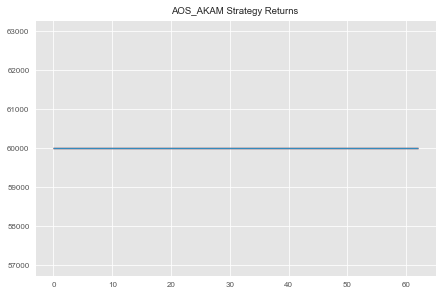

In [101]:
#creating returns and passing in our allocation amount
aos_akam.create_returns(60000,'AOS_AKAM')